In [1]:
import pandas as pd
import gower
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import pandas as pd
import gower
import numpy as np
from collections import Counter
from similar_plays import find_similar_scenarios, recommend_play
import matplotlib.pyplot as plt
from stats import *
from flask import Flask, request, jsonify


In [2]:
df = pd.read_csv("data/plays.csv", index_col=0)
request_data = {
    "away_team": "ATL",
    "defensiveTeam": "ATL",
    "down": "3",
    "gameClock_minutes": "10",
    "gameClock_seconds": "15",
    "home_team": "SF",
    "offensiveTeam": "SF",
    "preSnapHomeScore": "7",
    "preSnapVisitorScore": "5",
    "quarter": "1",
    "yardlineNumber": "50",
    "yardsToGo": "45"
  }
offensive_team = request_data["offensiveTeam"]
defensive_team = request_data["defensiveTeam"]

df = df[df["down"] == int(request_data["down"])]

#If 4th down is invoked
if int(request_data["down"]) == 4:
    df = df[df["down"] == 4]
    
similar_df, similar_df_specified, similar_df_defensive = produce_dataframes(df, offensive_team, defensive_team, request_data)

print(find_similar_scenarios(df, pd.Series(request_data), 20))

recommendation = recommend_play(similar_df, pd.Series(request_data))
    # Example: Fetch play details based on request_data
    # This is a placeholder for your logic to process request_data
    # For demonstration, returning the received data as a mock response
"""
    return jsonify({
        "received_data": request_data,
        "recommendation": recommendation,
        "historical_plays" : historical_play_types(similar_df, similar_df_specified, similar_df_defensive),
        "gower_values" : return_gower_values(similar_df, similar_df_specified, similar_df_defensive)
    })
    """
return_gower_values(similar_df, similar_df_specified, similar_df_defensive)



/var/folders/_j/bztmn43s0h9563f510vwl2wm0000gn/T/ipykernel_48936/826413356.py:1: DtypeWarning: Columns (180,181,183,184,190,191,194,195,206,207,210,211,214,215,219,220,221,234,235,236,237,238,239,249,250,254,255,256,261,263,264,267,268,269,270,284,285,302) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/plays.csv", index_col=0)
/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/similar_plays.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  play[col] = np.nan
/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/similar_plays.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all

       play_id          game_id  old_game_id home_team away_team season_type  \
40201   1310.0  2020_01_CLE_BAL   2020091301       BAL       CLE         REG   
40313    436.0   2020_01_DAL_LA   2020091312        LA       DAL         REG   
24730    284.0  2019_12_DEN_BUF   2019112401       BUF       DEN         REG   
57595   1415.0  2020_09_BAL_IND   2020110802       IND       BAL         REG   
45498    377.0    2020_03_GB_NO   2020092713        NO        GB         REG   
40611    365.0   2020_01_HOU_KC   2020091000        KC       HOU         REG   
25034    481.0    2019_12_GB_SF   2019112410        SF        GB         REG   
47052    380.0  2020_04_ARI_CAR   2020100400       CAR       ARI         REG   
23821    256.0    2019_11_NO_TB   2019111706        TB        NO         REG   
34983    262.0   2019_16_KC_CHI   2019122214       CHI        KC         REG   
16910    644.0  2019_08_MIA_PIT   2019102800       PIT       MIA         REG   
46912    411.0  2020_03_WAS_CLE   202009

{'All Teams': [0.10429680347442627,
  0.11021987348794937,
  0.11197220534086227,
  0.11422210186719894,
  0.11715436726808548,
  0.11905040591955185,
  0.12276271730661392,
  0.12299780547618866,
  0.12658259272575378,
  0.12730976939201355,
  0.12789498269557953,
  0.12825340032577515,
  0.12839588522911072,
  0.13123434782028198,
  0.13137437403202057,
  0.13246415555477142,
  0.13368241488933563,
  0.13465748727321625,
  0.1362641602754593,
  0.13673977553844452,
  0.1372436136007309,
  0.1376877874135971,
  0.13788016140460968,
  0.13819043338298798,
  0.13825774192810059,
  0.1384100466966629,
  0.13867466151714325,
  0.1389429271221161,
  0.13997352123260498,
  0.14002904295921326,
  0.14141802489757538,
  0.1420675665140152,
  0.14214397966861725,
  0.14307038486003876,
  0.1433548629283905,
  0.14356814324855804,
  0.14377053081989288,
  0.14394201338291168,
  0.14404670894145966,
  0.14409731328487396,
  0.14440882205963135,
  0.14447416365146637,
  0.14504359662532806,
  0.1

In [15]:
from collections import Counter
df["play_type_nfl"].isna().sum()

0

In [18]:
import statsmodels.api as sm

# Example data
# n1 and n2 are the sample sizes
# success1 and success2 are the number of successes in each sample
n1, success1 = 99, 21  # e.g., 40 successes out of 100 trials
n2, success2 = 99, 14  # e.g., 30 successes out of 100 trials

# Conducting the two-proportion z-test
z_stat, p_value = sm.stats.proportions_ztest([success1, success2], [n1, n2])

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")


Z-statistic: 1.3040757251526904
P-value: 0.19220776463809264


In [19]:
df = pd.read_csv("data/plays.csv", index_col=0)
offensive_team = "SF"
defensive_team = "ATL"
#df_specified  = specify_team(df, "SF")
#df_specified_def = specify_defense(df, defenseTeam)
"""similar_df_specified = find_similar_scenarios(df_specified, df_specified.iloc[0][["yardlineNumber", "quarter", "down", 'gameClock_minutes', 'gameClock_seconds', "yardsToGo", "preSnapHomeScore", "preSnapVisitorScore"]], 100)
similar_df = find_similar_scenarios(df, df_specified.iloc[0][["yardlineNumber", "quarter", "down", 'gameClock_minutes', 'gameClock_seconds', "yardsToGo", "preSnapHomeScore", "preSnapVisitorScore"]], 200)
similar_df_defensive = find_similar_scenarios(df_specified_def, df_specified.iloc[0][["yardlineNumber", "quarter", "down", 'gameClock_minutes', 'gameClock_seconds', "yardsToGo", "preSnapHomeScore", "preSnapVisitorScore"]], 100)
"""
similar_df, similar_df_specified, similar_df_defensive = produce_dataframes(df, offensive_team, defensive_team, df.iloc[0][["yardlineNumber", "quarter", "down", 'gameClock_minutes', 'gameClock_seconds', "yardsToGo", "preSnapHomeScore", "preSnapVisitorScore"]])
return_gower_values(similar_df, similar_df_specified, similar_df_defensive)

/var/folders/_j/bztmn43s0h9563f510vwl2wm0000gn/T/ipykernel_48936/2979920312.py:1: DtypeWarning: Columns (37,38,50,180,181,183,184,190,191,194,195,196,197,206,207,208,209,210,211,212,213,214,215,219,220,221,234,235,236,237,238,239,249,250,254,255,256,261,263,264,267,268,269,270,284,285,293,294,295,296,297,300,302,303,304,373,374,375,376,378,380,381,382) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/plays.csv", index_col=0)
/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/similar_plays.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  play[col] = np.nan
/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/similar_plays.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

46452     0.000000
21067     0.000000
19251     0.000000
9757      0.000000
7913      0.000000
31489     0.000000
36036     0.000000
13383     0.000000
41620     0.000000
45561     0.000000
38659     0.000000
803       0.000000
29944     0.001276
8655      0.001276
44560     0.001276
69563     0.001276
4975      0.001276
34851     0.001276
34396     0.001276
50209     0.001276
82657     0.001276
8804      0.001276
38517     0.001276
24736     0.001276
121583    0.001276
34247     0.001276
129684    0.001276
47329     0.001276
4826      0.001276
6175      0.001276
42972     0.001276
5867      0.001276
15327     0.001276
36841     0.001276
12455     0.001276
6337      0.001276
28121     0.001276
38802     0.001276
120809    0.001276
55948     0.001276
33318     0.001276
23949     0.001276
3484      0.001276
105267    0.001276
7277      0.001276
135488    0.001276
26800     0.001276
2885      0.001276
5436      0.001276
Name: gower_similarity, dtype: float32


/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend/similar_plays.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["gower_similarity"] = values[1:]


{'All Teams': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0

In [21]:
print(df.iloc[0][["yardlineNumber", "quarter", "down", 'gameClock_minutes', 'gameClock_seconds', "yardsToGo", "preSnapHomeScore", "preSnapVisitorScore"]])
similar_df[["yardlineNumber", "quarter", "down", 'gameClock_minutes', 'gameClock_seconds', "yardsToGo", "preSnapHomeScore", "preSnapVisitorScore"]]

yardlineNumber         77.0
quarter                 1.0
down                    1.0
gameClock_minutes        15
gameClock_seconds         0
yardsToGo              10.0
preSnapHomeScore        0.0
preSnapVisitorScore     0.0
Name: 0, dtype: object


,yardlineNumber,quarter,down,gameClock_minutes,gameClock_seconds,yardsToGo,preSnapHomeScore,preSnapVisitorScore
46452,77.0,1.0,1.0,15,0,10.0,0.0,0.0
21067,77.0,1.0,1.0,15,0,10.0,0.0,0.0
19251,77.0,1.0,1.0,15,0,10.0,0.0,0.0
9757,77.0,1.0,1.0,15,0,10.0,0.0,0.0
7913,77.0,1.0,1.0,15,0,10.0,0.0,0.0
31489,77.0,1.0,1.0,15,0,10.0,0.0,0.0
36036,77.0,1.0,1.0,15,0,10.0,0.0,0.0
13383,77.0,1.0,1.0,15,0,10.0,0.0,0.0
41620,77.0,1.0,1.0,15,0,10.0,0.0,0.0
45561,77.0,1.0,1.0,15,0,10.0,0.0,0.0


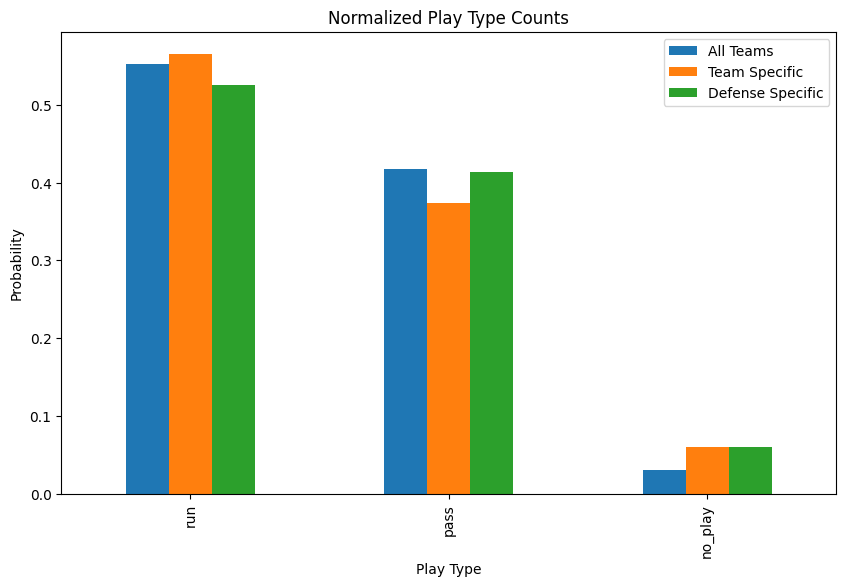

,All Teams,Team Specific,Defense Specific
play_type,,,
run,0.552764,0.565657,0.525253
pass,0.417085,0.373737,0.414141
no_play,0.030151,0.060606,0.060606


In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have two dataframes: similar_df and similar_all_df
# Normalize the value counts for 'play_type' for both dataframes
normalized_counts_similar = similar_df['play_type'].value_counts(normalize=True)
normalized_counts_specified = similar_df_specified['play_type'].value_counts(normalize=True)
normalized_counts_defensive = similar_df_defensive["play_type"].value_counts(normalize=True)
# Convert to DataFrame
df_normalized_counts_similar = normalized_counts_similar.to_frame(name='All Teams')
df_normalized_counts_specified = normalized_counts_specified.to_frame(name='Team Specific')
df_normalized_counts_defensive = normalized_counts_defensive.to_frame(name='Defense Specific')

# Merge the two dataframes on the index (play_type), this will align the similar play types
df_normalized_counts = df_normalized_counts_similar.join(df_normalized_counts_specified, how='outer')
df_normalized_counts = df_normalized_counts.join(df_normalized_counts_defensive, how='outer')
# Plot the data
df_normalized_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Normalized Play Type Counts')
plt.ylabel('Probability')
plt.xlabel('Play Type')
plt.show()

#df_normalized_counts.fillna(0).to_dict()
df_normalized_counts.fillna(0)

In [94]:
temp_df = similar_df.groupby("play_type").mean("yards_gained")["yards_gained"].to_frame(name='All Teams').join(similar_df_specified.groupby("play_type").mean("yards_gained")["yards_gained"].to_frame("Team Specific"), how="outer")
temp_df.join(similar_df_defensive.groupby("play_type").mean("yards_gained")["yards_gained"].to_frame("Defense Specific"), how="outer").fillna(0).to_dict()


{'All Teams': {'no_play': 0.0,
  'pass': 7.0602409638554215,
  'run': 5.127272727272727},
 'Team Specific': {'no_play': 0.0, 'pass': 6.0, 'run': 4.821428571428571},
 'Defense Specific': {'no_play': 0.0,
  'pass': 9.292682926829269,
  'run': 4.519230769230769}}

{'All Teams': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
        0.00127551, 0.00127551, 0.0

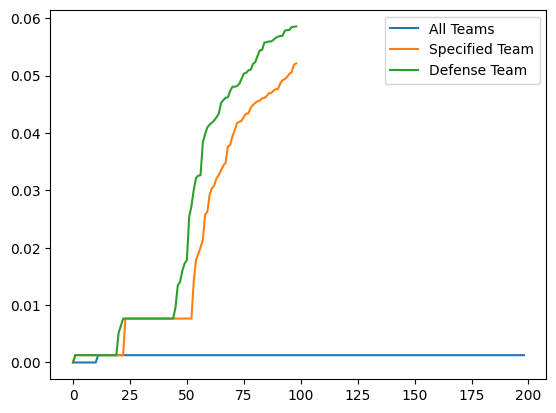

In [95]:
plt.plot(np.sort(similar_df["gower_similarity"].values), label = "All Teams")
plt.plot(np.sort(similar_df_specified["gower_similarity"]), label="Specified Team")
plt.plot(np.sort(similar_df_defensive["gower_similarity"]), label = "Defense Team")
plt.legend()
{"All Teams" :np.sort(similar_df["gower_similarity"].values), "Specified Team" : np.sort(similar_df_specified["gower_similarity"]), "Defense Specific" : np.sort(similar_df_defensive["gower_similarity"])}

In [101]:
return_gower_values(similar_df, similar_df_specified, similar_df_defensive)

{'All Teams': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.0012755101779475808,
  0.001275

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have two dataframes: similar_df and similar_all_df
# Normalize the value counts for 'play_type' for both dataframes
normalized_counts_similar = similar_df['play_type'].value_counts(normalize=True)
#normalized_counts_similar_all = similar_all_df['play_type'].value_counts(normalize=True)

# Convert to DataFrame
df_normalized_counts_similar = normalized_counts_similar.to_frame(name='Similar')
#df_normalized_counts_similar_all = normalized_counts_similar_all.to_frame(name='Similar_All')

# Merge the two dataframes on the index (play_type), this will align the similar play types
df_normalized_counts = df_normalized_counts_similar.join(df_normalized_counts_similar_all, how='outer')

# Plot the data
df_normalized_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Normalized Play Type Counts')
plt.ylabel('Probability')
plt.xlabel('Play Type')
plt.show()


NameError: name 'similar_all_df' is not defined

<Axes: title={'center': 'yards_gained'}, xlabel='play_type'>

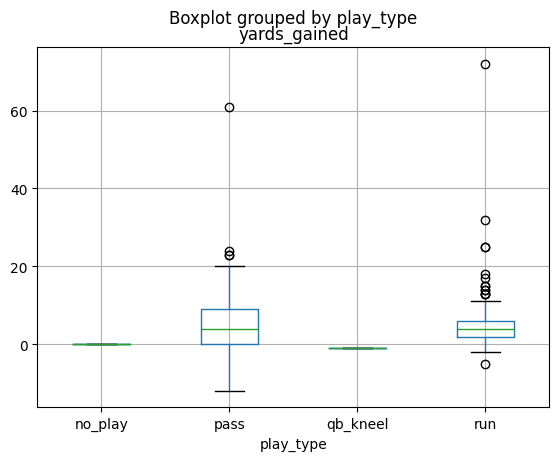

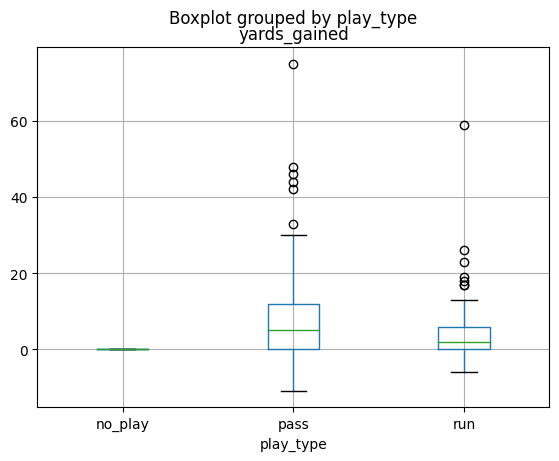

In [283]:
similar_df.boxplot(column=["yards_gained"], by="play_type")
similar_all_df.boxplot(column=["yards_gained"], by="play_type")
#plt.boxplot(similar_df.groupby('play_type')["yards_gained"])


In [284]:
similar_all_df[similar_all_df["play_type"] == "pass"]

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_

In [285]:
df_new  = similar_df[similar_df["play_type"] == "pass"][["defteam", "yardline_100", "quarter_seconds_remaining", "down", "qtr", "yards_gained", "gower_similarity"]]

import pandas as pd
import statsmodels.api as sm

# Assuming 'df' is your DataFrame
# Convert 'defteam', 'down', and 'qtr' to dummy variables
# Note that 'drop_first=True' is used to avoid the dummy variable trap by dropping one category.
df_with_dummies = pd.get_dummies(df_new, columns=['defteam', "qtr", "down"], drop_first=True)
df_with_dummies.replace({False: 0, True: 1}, inplace=True)
# Extracting the independent variables (X) and the dependent variable (y)
# We also need to include the new dummy variables for 'down' and 'qtr' in our model

X_columns = ["yardline_100", "quarter_seconds_remaining"] + list(df_with_dummies.columns[df_with_dummies.columns.str.startswith('defteam_')]) + list(df_with_dummies.columns[df_with_dummies.columns.str.startswith('down_')]) + list(df_with_dummies.columns[df_with_dummies.columns.str.startswith('qtr_')])
X = df_with_dummies[X_columns]
y = df_with_dummies["yards_gained"]


# Use 'gower_similarity' as weights for the regression
weights = df_with_dummies["gower_similarity"]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the weighted regression model
wls_model = sm.WLS(y, X, weights=1 - weights).fit()

# Summary of the regression results
wls_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           yards_gained   R-squared:                       0.247
Model:                            WLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.9034
Date:                Sat, 04 Nov 2023   Prob (F-statistic):              0.597
Time:                        19:31:00   Log-Likelihood:                -315.53
No. Observations:                  91   AIC:                             681.1
Df Residuals:                      66   BIC:                             743.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0309      9.090      0.003      0.997     -18.119      18.180
yardline_100                 -0.0049      0.079     -0.062      0.951      -0.162       0.152
quarter_seconds_remaining     0.0041      0.004      0.920      0.361      -0.005       0.013
defteam_BUF                   7.8925      5.927      1.332      0.188      -3.942      19.727
defteam_CIN                   3.3352      5.977      0.558      0.579      -8.598      15.268
defteam_CLE                  10.1973      5.884      1.733      0.088      -1.551      21.946
defteam_DAL                  19.4286     10.684      1.818      0.074      -1.903      40.760
defteam_HOU                   3.9737      6.791      0.585      0.560      -9.585      17.533
defteam_IND                  10.4362      6.802      1.534      0.130      -3.145      24.017
defteam_JAX                  -1.0205      8.055     -0.127      0.900     -17.102      15.061
defteam_KC                    2.0159      6.312      0.319      0.750     -10.586      14.618
defteam_LA                   -2.5409     10.773     -0.236      0.814     -24.049      18.967
defteam_MIA                  23.0456     10.052      2.293      0.025       2.975      43.116
defteam_NE                   -0.2903      6.535     -0.044      0.965     -13.338      12.757
defteam_NYG                   4.4867     11.711      0.383      0.703     -18.895      27.868
defteam_NYJ                   4.8335      6.711      0.720      0.474      -8.566      18.233
defteam_PHI                   4.5841      6.721      0.682      0.498      -8.836      18.004
defteam_PIT                   3.4431      5.748      0.599      0.551      -8.033      14.919
defteam_SEA                   0.0306     10.564      0.003      0.998     -21.061      21.123
defteam_SF                    1.9822     10.137      0.196      0.846     -18.257      22.221
defteam_TEN                   1.2594      5.560      0.227      0.822      -9.842      12.361
defteam_WAS                   3.2105      7.317      0.439      0.662     -11.398      17.819
qtr_2.0                       2.5691      8.649      0.297      0.767     -14.698      19.836
qtr_3.0                      -0.5357      7.951     -0.067      0.946     -16.411      15.339
qtr_4.0                       5.1941     10.393      0.500      0.619     -15.556      25.944
==============================================================================
Omnibus:                       82.844   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              982.521
Skew:                           2.705   Prob(JB):                    4.45e-214
Kurtosis:                      18.161   Cond. No.                     1.24e+04
========================================================

In [292]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming 'df' is your DataFrame with the necessary preprocessing done

# Define the features and target
X = df_new[["defteam", "yardline_100", "quarter_seconds_remaining", "down", "qtr"]]
y = df_new['yards_gained']

# List of categorical features
categorical_features = ["defteam", "down", "qtr"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Regressor
cb = CatBoostRegressor(loss_function='RMSE', cat_features=categorical_features, verbose=0)

# Fit the model
cb.fit(X_train, y_train)

# Predict
y_pred = cb.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


RMSE: 8.537961819786172


In [297]:
df_new["yards_gained"]

216     15.0
957      1.0
291     15.0
883      2.0
217    -12.0
        ... 
2554     8.0
1915    -7.0
1605     9.0
1075    24.0
338      4.0
Name: yards_gained, Length: 91, dtype: float64

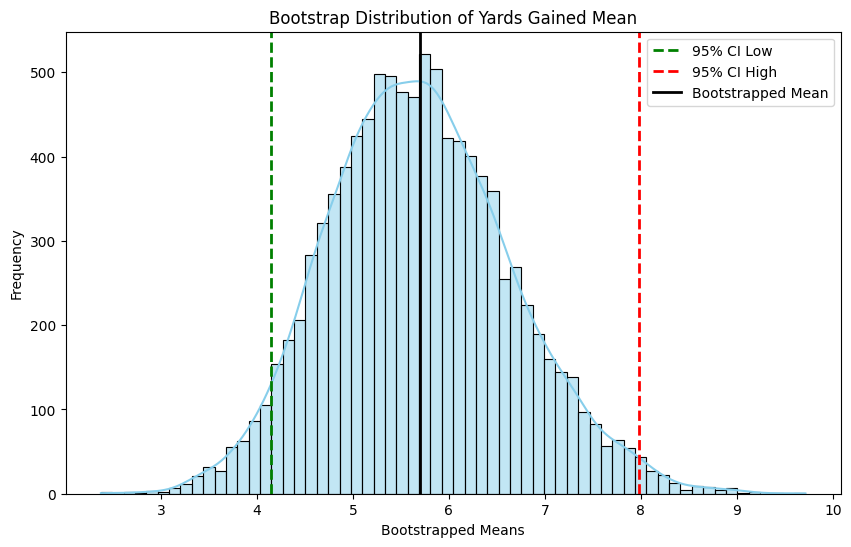

In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

# Assuming 'df_new' is your DataFrame and 'yards_gained' is the column of interest

# Calculate the mean and 95% confidence interval using bootstrap
bootstrapped_mean = bootstrap((df_new['yards_gained'].values,), np.mean, confidence_level=0.95)
# Extract the bootstrap distribution and the confidence interval from your result
bootstrap_distribution = bootstrapped_mean.bootstrap_distribution
confidence_interval = bootstrapped_mean.confidence_interval

# Plot the bootstrap distribution as a histogram
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_distribution, kde=True, color='skyblue')

# Add lines for the confidence interval
plt.axvline(confidence_interval.low, color='green', linestyle='--', linewidth=2, label='95% CI Low')
plt.axvline(confidence_interval.high, color='red', linestyle='--', linewidth=2, label='95% CI High')

# Add a line for the mean of the bootstrap distribution
plt.axvline(np.mean(bootstrap_distribution), color='black', linestyle='-', linewidth=2, label='Bootstrapped Mean')

# Improve the aesthetics
plt.title('Bootstrap Distribution of Yards Gained Mean')
plt.xlabel('Bootstrapped Means')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


<Axes: xlabel='yards_gained', ylabel='Count'>

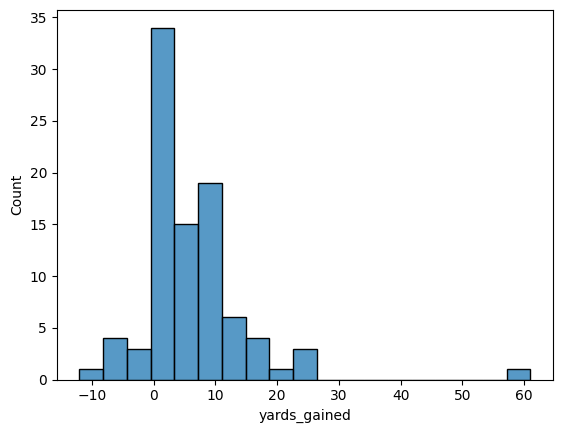

In [303]:
sns.histplot(df_new["yards_gained"])

<Axes: title={'center': 'yards_gained'}, xlabel='week'>

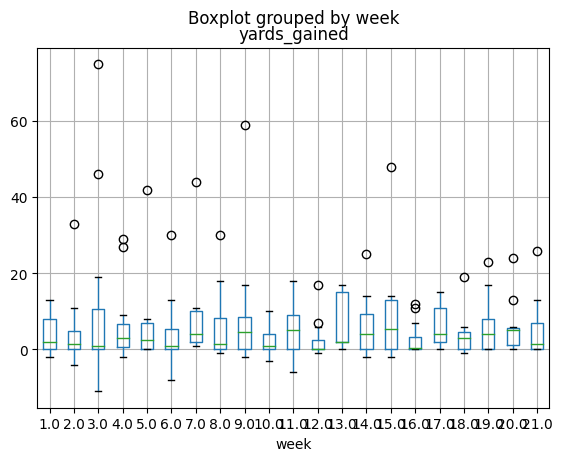

In [308]:

similar_all_df.boxplot(column=["yards_gained"], by="week")

In [311]:
df["interception"].sum()

839.0

In [1]:
df

NameError: name 'df' is not defined